In [107]:
import math
import sys
import os

import IPython
import matplotlib.pylab as plt
import numpy as np
from scipy import signal


In [123]:
print(sys.path[0])
out_dir = '../firmware/audio_shield_firmware/Core/Inc'
out_name = "tapering_window.h"
var_name = "tukey_window"
buffer_length = 1024
fade_length_ratio = 0.2
print(f"Buffer length is {buffer_length}")

/Users/hoffet/Documents/LCAV_Repo/crazyflie-audio/python
Buffer length is 1024


In [124]:
#Ramp
fade_length = np.ceil(buffer_length*fade_length_ratio)
print(f"Fade length is {fade_length} samples on a buffer of {buffer_length}")
fade_in = np.arange(0,1,1/(buffer_length*fade_length_ratio))
constant_section = np.ones(int(buffer_length-2*fade_length)) 
ramp_window = np.concatenate([fade_in,constant_section, 1-fade_in])

Fade length is 205.0 samples on a buffer of 1024


In [125]:
#Tukey
tukey_window = signal.tukey(buffer_length)

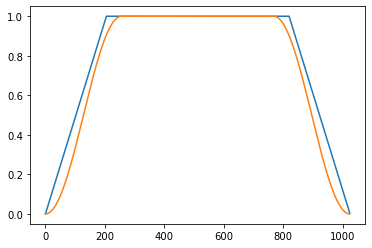

In [126]:
plt.plot(ramp_window)
plt.plot(tukey_window)

In [128]:
fname = f"{out_dir}/{out_name}"

with open(fname, "w+") as f:
        f.write(f"#ifndef __TAPERING_WINDOW_H \n#define __TAPERING_WINDOW_H\n\n")
    
        f.write(f"float32_t {var_name}[{buffer_length}] = " + r"{")
        [f.write(f"{s:.15f}, ",) for s in tukey_window[:-1]]
        [f.write(f"{s:.15f}",) for s in tukey_window[-1:]]
        # np.array_str(signal, precision=15, max_line_width=80))
        f.write(r"};" + " \n\n")
        
        f.write(f"#endif /* __FFT_BIN_DATA_H */")

